In [1]:
# PCA with numpy by Wendy Navarrete https://towardsdatascience.com/pca-with-numpy-58917c1d0391
%matplotlib inline 
# With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [2]:
# Dataset
irisdf = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                  header=None) 
irisdf.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
irisdf.dropna(how = 'all', inplace = True)
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

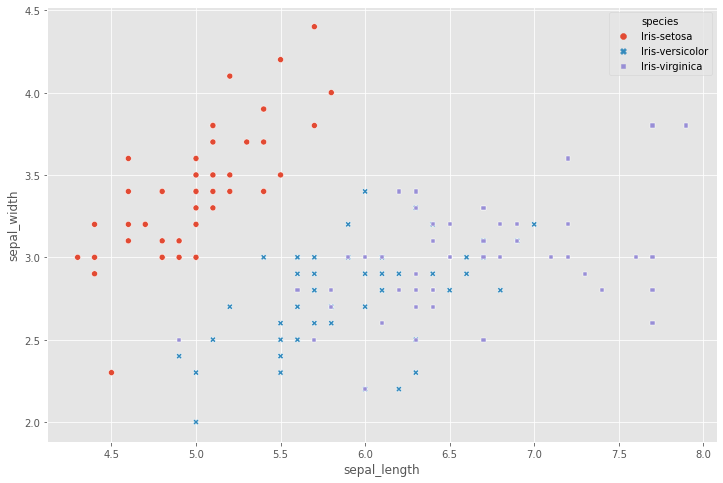

In [5]:
# Visualizing Data (plot data using seaborn)
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)
sns.scatterplot(x = irisdf.sepal_length, y = irisdf.sepal_width, hue = irisdf.species, style = irisdf.species)

In [15]:
# Define function for standardizing the data
def standardize_data(arr):
    '''    
    This function standardize an array with subtraction of the mean and division of the standard deviation 
    input: array
    return: standardized array
    '''
    rows, columns = arr.shape
    standardizedArray = np.zeros(shape = (rows,columns))
    tempArray = np.zeros(rows)
    
    for column in range(columns):
        
        mean = np.mean(arr[:,column])
        std = np.std(arr[:,column])
        tempArray = np.empty(0)
        
        for element in arr[:,column]:
            tempArray = np.append(tempArray, (element-mean)/std)
        
        standardizedArray[:,column] = tempArray
        
    return standardizedArray

In [16]:
# Standardizing data 
X = irisdf.iloc[:,0:4].values
X = standardize_data(X)

In [26]:
# Computing the Eigenvectors and Eigenvalues
cov_matrix = np.cov(X.T) # X.T is the transpose of X
# Eigendecomposition of the covariance matrix
eig_val, eig_vec = np.linalg.eig(cov_matrix)
print("Eigenvector: \n", eig_vec,"\n")
print("Eigenvalues: \n", eig_val,"\n")

Eigenvector: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Eigenvalues: 
 [2.93035378 0.92740362 0.14834223 0.02074601] 



In [31]:
# Calculating the explained variance on each component
var_explain = []
for i in eig_val:
    var_explain.append(i/sum(eig_val)*100)
#print(var_explain)
cumsum_var_explain = np.cumsum(var_explain)
print(cumsum_var_explain)

[ 72.77045209  95.80097536  99.48480732 100.        ]


Text(0.5, 1.0, 'Explained variance vs Number of components')

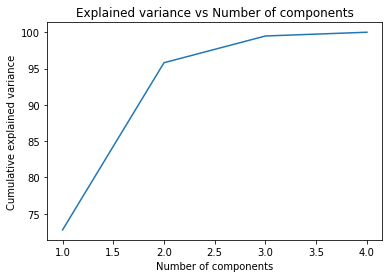

In [44]:
# Visualize the eigenvalues and find the "elbow" in the graph
sns.lineplot(x = list(range(1,5)), y = cumsum_var_explain)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")

In [92]:
# Project data onto lower-dimensional linear subspace
# Using first two components (because those explain mroe than 95% of total variance)
project_matrix = eig_vec[:,:2] # first two columns
print(project_matrix)

[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


numpy.ndarray

In [99]:
# Getting the project of original standardized X and eigenvectors
X_pca = X.dot(project_matrix)
print(X_pca)

[[-2.26454173e+00 -5.05703903e-01]
 [-2.08642550e+00  6.55404729e-01]
 [-2.36795045e+00  3.18477311e-01]
 [-2.30419716e+00  5.75367713e-01]
 [-2.38877749e+00 -6.74767397e-01]
 [-2.07053681e+00 -1.51854856e+00]
 [-2.44571134e+00 -7.45626750e-02]
 [-2.23384186e+00 -2.47613932e-01]
 [-2.34195768e+00  1.09514636e+00]
 [-2.18867576e+00  4.48629048e-01]
 [-2.16348656e+00 -1.07059558e+00]
 [-2.32737775e+00 -1.58587455e-01]
 [-2.22408272e+00  7.09118158e-01]
 [-2.63971626e+00  9.38281982e-01]
 [-2.19229151e+00 -1.88997851e+00]
 [-2.25146521e+00 -2.72237108e+00]
 [-2.20275048e+00 -1.51375028e+00]
 [-2.19017916e+00 -5.14304308e-01]
 [-1.89407429e+00 -1.43111071e+00]
 [-2.33994907e+00 -1.15803343e+00]
 [-1.91455639e+00 -4.30465163e-01]
 [-2.20464540e+00 -9.52457317e-01]
 [-2.77416979e+00 -4.89517027e-01]
 [-1.82041156e+00 -1.06750793e-01]
 [-2.22821750e+00 -1.62186163e-01]
 [-1.95702401e+00  6.07892567e-01]
 [-2.05206331e+00 -2.66014312e-01]
 [-2.16819365e+00 -5.52016495e-01]
 [-2.14030596e+00 -3